In [35]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,8)
import pylab as plt
import numpy as np
from scipy.special import erf
from scipy.stats import norm

In [4]:
sig_g = 1.
sig_r = 1.
sig_j = np.array([sig_g, sig_r])

In [5]:
sed_1_g = 0.5
sed_1_r = 0.5
sed_1 = np.array([sed_1_g, sed_1_r])

In [216]:
dgvals = np.linspace(-5, 10, 100)
drvals = np.linspace(-5, 10, 100)
d_j = np.meshgrid(dgvals, drvals)
#dextent = [-2,10,-2,10]
dextent = [-5,10,-5,10]
ax1 = [-2,10,-2,10]

In [170]:
d_j = np.array(d_j)
d_j.shape

(2, 100, 100)

In [171]:
def get_pratio(d_j, sig_j, sed_i):
    a_i = alpha - np.sum(d_j * sed_i[:,np.newaxis,np.newaxis] / sig_j[:,np.newaxis,np.newaxis]**2, axis=0)
    b_i = 0.5 * np.sum(sed_i**2 / sig_j**2)
    beta_i = 2 * np.sqrt(b_i)
    c_i = a_i / beta_i
    pratio_i = np.sqrt(np.pi) / beta_i * np.exp(c_i**2) * (1. - erf(c_i))
    return pratio_i

In [172]:
alpha = 1.

In [173]:
a_1 = alpha - np.sum(d_j * sed_1[:,np.newaxis,np.newaxis] / sig_j[:,np.newaxis,np.newaxis]**2, axis=0)

In [174]:
a_1.shape

(100, 100)

In [175]:
b_1 = 0.5 * np.sum(sed_1**2 / sig_j**2)
b_1

0.25

In [176]:
beta_1 = 2 * np.sqrt(b_1)
c_1 = a_1 / beta_1

In [207]:
p_bg= 1./np.prod(np.sqrt(2.*np.pi)*sig_j) * np.exp(-0.5 * np.sum((d_j / sig_j[:,np.newaxis,np.newaxis])**2, axis=0))

In [177]:
pratio_1 = np.sqrt(np.pi) / beta_1 * np.exp(c_1**2) * (1. - erf(c_1))
pratio_a = pratio_1
print(pratio_a.min(), pratio_a.max())

0.0 5.3389759701493875e+35


In [178]:
falsepos = norm.sf(5.)
print(falsepos)
print(falsepos * 4e3*4e3, 'false positives per 4k x 4k image')

2.8665157187919333e-07
4.586425150067093 false positives per 4k x 4k image


/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


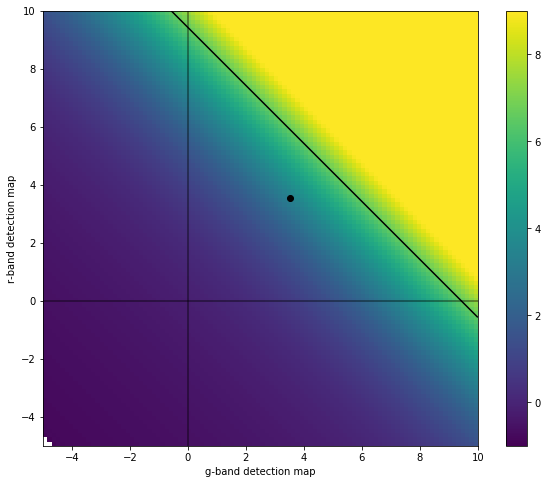

In [179]:
plt.imshow(np.log10(pratio_a), interpolation='nearest', origin='lower', extent=dextent, vmin=-1, vmax=9)
plt.colorbar();
plt.contour(np.log10(pratio_a), levels=[-np.log10(falsepos)], colors=['k'], extent=dextent);
plt.xlabel('g-band detection map')
sc = 5. / np.sqrt(np.sum(sed_1**2))
plt.plot(sc * sed_1[0], sc * sed_1[1], 'ko');
plt.ylabel('r-band detection map');
plt.axhline(0, color='k', alpha=0.5)
plt.axvline(0, color='k', alpha=0.5)

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10


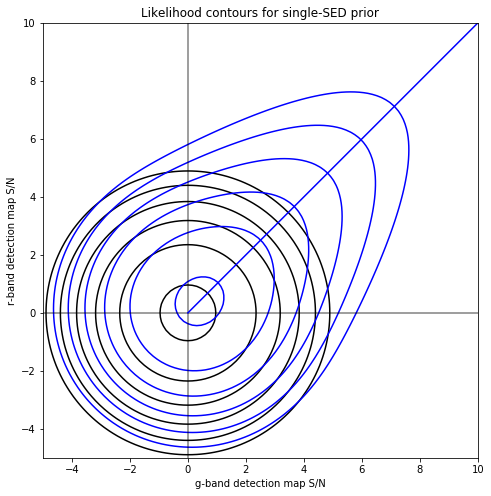

In [214]:
levs = np.arange(-6, 0)
p_fg_a = p_bg * pratio_a
plt.contour(np.log10(p_bg), levels=levs, linestyles='-', extent=dextent, colors='k')
plt.contour(np.log10(p_fg_a), levels=levs, linestyles='-', extent=dextent, colors='b');
plt.xlabel('g-band detection map S/N')
plt.ylabel('r-band detection map S/N');
plt.axhline(0, color='k', alpha=0.5)
plt.axvline(0, color='k', alpha=0.5);
ax = plt.axis()
xx = np.array([0,100]);
plt.plot(xx * sed_1[0], xx * sed_1[1], 'b-');
#plt.plot(xx * sed_2[0], xx * sed_2[1], 'r-');
#plt.plot(xx * sed_3[0], xx * sed_3[1], 'm-');
plt.axis(ax);
plt.axis('square');
plt.axis(ax);
plt.title('Likelihood contours for single-SED prior')
plt.savefig('prob-contours-a.png')

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


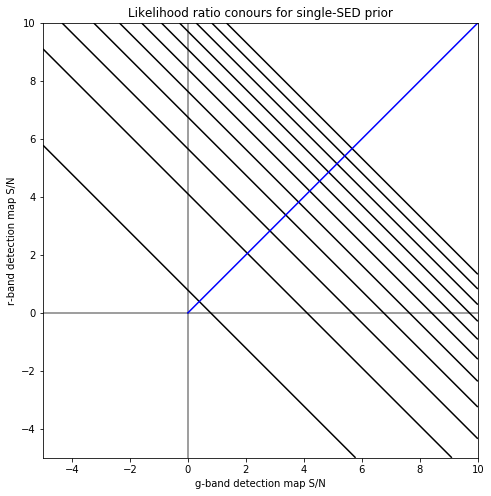

In [215]:
levs = np.arange(0, 11)
p_fg_a = p_bg * pratio_a
plt.contour(np.log10(pratio_a), levels=levs, linestyles='-', extent=dextent, colors='k')
plt.xlabel('g-band detection map S/N')
plt.ylabel('r-band detection map S/N');
plt.axhline(0, color='k', alpha=0.5)
plt.axvline(0, color='k', alpha=0.5);
ax = plt.axis()
xx = np.array([0,100]);
plt.plot(xx * sed_1[0], xx * sed_1[1], 'b-');
#plt.plot(xx * sed_2[0], xx * sed_2[1], 'r-');
#plt.plot(xx * sed_3[0], xx * sed_3[1], 'm-');
plt.axis(ax);
plt.axis('square');
plt.axis(ax);
plt.title('Likelihood ratio conours for single-SED prior')
plt.savefig('prob-rel-a.png')

In [180]:
sed_2_g = 1./3.5
sed_2_r = 2.5/3.5
sed_2 = np.array([sed_2_g, sed_2_r])

In [181]:
a_2 = alpha - np.sum(d_j * sed_2[:,np.newaxis,np.newaxis] / sig_j[:,np.newaxis,np.newaxis]**2, axis=0)
b_2 = 0.5 * np.sum(sed_2**2 / sig_j**2)
beta_2 = 2 * np.sqrt(b_2)
c_2 = a_2 / beta_2
pratio_2 = np.sqrt(np.pi) / beta_2 * np.exp(c_2**2) * (1. - erf(c_2))

In [182]:
pratio_b = pratio_1 * 0.5 + pratio_2 * 0.5

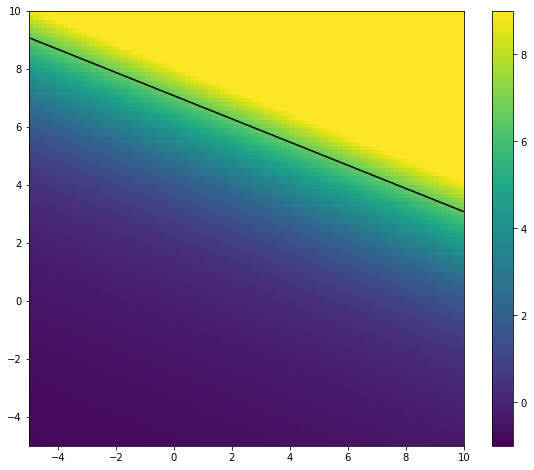

In [183]:
plt.imshow(np.log10(pratio_2), interpolation='nearest', origin='lower', extent=dextent, vmin=-1, vmax=9)
plt.colorbar();
plt.contour(np.log10(pratio_2), levels=[-np.log10(falsepos)], colors=['k'], extent=dextent);

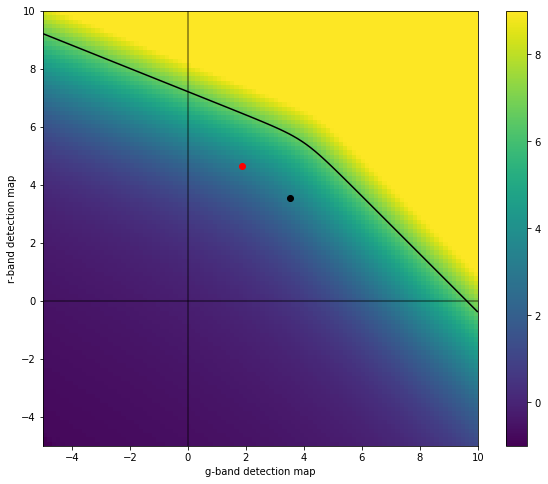

In [184]:
plt.imshow(np.log10(pratio_b), interpolation='nearest', origin='lower', extent=dextent, vmin=-1, vmax=9)
plt.colorbar();
plt.contour(np.log10(pratio_b), levels=[-np.log10(falsepos)], colors=['k'], extent=dextent);
sc = 5. / np.sqrt(np.sum(sed_1**2))
plt.plot(sc * sed_1[0], sc * sed_1[1], 'ko');
sc = 5. / np.sqrt(np.sum(sed_2**2))
plt.plot(sc * sed_2[0], sc * sed_2[1], 'ro');
plt.xlabel('g-band detection map')
plt.ylabel('r-band detection map');
plt.axhline(0, color='k', alpha=0.5)
plt.axvline(0, color='k', alpha=0.5);

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10


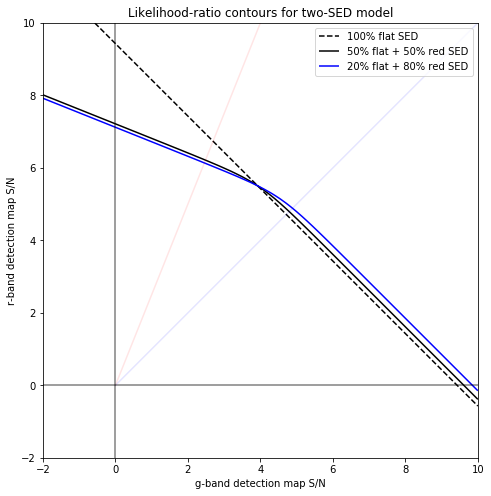

In [229]:
pratio_c = pratio_1 * 0.2 + pratio_2 * 0.8
#plt.imshow(np.log10(pratio), interpolation='nearest', origin='lower', extent=dextent, vmin=-1, vmax=9)
#plt.colorbar();
c0 = plt.contour(np.log10(pratio_a), levels=[-np.log10(falsepos)], colors=['k'], linestyles=['--'], extent=dextent)
c1 = plt.contour(np.log10(pratio_b), levels=[-np.log10(falsepos)], colors=['k'], extent=dextent)
c2 = plt.contour(np.log10(pratio_c), levels=[-np.log10(falsepos)], colors=['b'], extent=dextent);
#sc = 5. / np.sqrt(np.sum(sed_1**2))
#plt.plot(sc * sed_1[0], sc * sed_1[1], 'ko');
#sc = 5. / np.sqrt(np.sum(sed_2**2))
#plt.plot(sc * sed_2[0], sc * sed_2[1], 'ro');
xx = np.array([0,100]);
plt.plot(xx * sed_1[0], xx * sed_1[1], 'b-', alpha=0.1);
plt.plot(xx * sed_2[0], xx * sed_2[1], 'r-', alpha=0.1);

plt.xlabel('g-band detection map S/N')
plt.ylabel('r-band detection map S/N');
plt.axhline(0, color='k', alpha=0.5)
plt.axvline(0, color='k', alpha=0.5);
plt.axis('square');
plt.axis(ax1);
plt.legend([c0.collections[0], c1.collections[0], c2.collections[0]],
           ['100% flat SED', '50% flat + 50% red SED', '20% flat + 80% red SED'], loc='upper right')
plt.title('Likelihood-ratio contours for two-SED model');
plt.savefig('prob-rel-b.png')

In [186]:
sed_3_g = 0.
sed_3_r = 1.
sed_3 = np.array([sed_3_g, sed_3_r])

In [187]:
a_3 = alpha - np.sum(d_j * sed_3[:,np.newaxis,np.newaxis] / sig_j[:,np.newaxis,np.newaxis]**2, axis=0)
b_3 = 0.5 * np.sum(sed_3**2 / sig_j**2)
beta_3 = 2 * np.sqrt(b_3)
c_3 = a_3 / beta_3
pratio_3 = np.sqrt(np.pi) / beta_3 * np.exp(c_3**2) * (1. - erf(c_3))

In [231]:
pratio_d = pratio_1 * 0.49 + pratio_2 * 0.49 + pratio_3 * 0.02

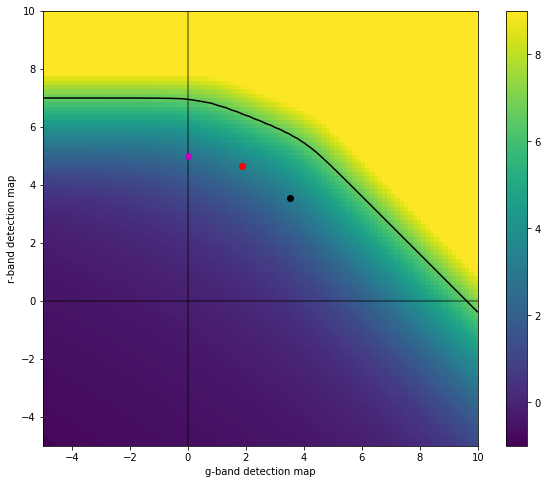

In [232]:
plt.imshow(np.log10(pratio_d), interpolation='nearest', origin='lower', extent=dextent, vmin=-1, vmax=9)
plt.colorbar();
plt.axhline(0, color='k', alpha=0.5)
plt.axvline(0, color='k', alpha=0.5);
#plt.contour(np.log10(pratio_d), levels=[-np.log10(falsepos)], colors=['k'], extent=dextent);
plt.contour(pratio_d, levels=[1./falsepos], colors=['k'], extent=dextent);
sc = 5. / np.sqrt(np.sum(sed_1**2))
plt.plot(sc * sed_1[0], sc * sed_1[1], 'ko');
sc = 5. / np.sqrt(np.sum(sed_2**2))
plt.plot(sc * sed_2[0], sc * sed_2[1], 'ro');
sc = 5. / np.sqrt(np.sum(sed_3**2))
plt.plot(sc * sed_3[0], sc * sed_3[1], 'mo');
plt.xlabel('g-band detection map')
plt.ylabel('r-band detection map');

In [233]:
np.sum(pratio_d)

4.761633271987569e+35

In [234]:
p_fg_d = p_bg * pratio_d

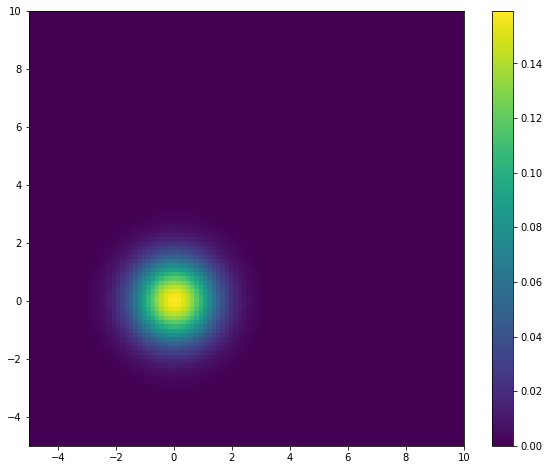

In [235]:
plt.imshow(p_bg, extent=dextent, interpolation='nearest', origin='lower');
plt.colorbar();

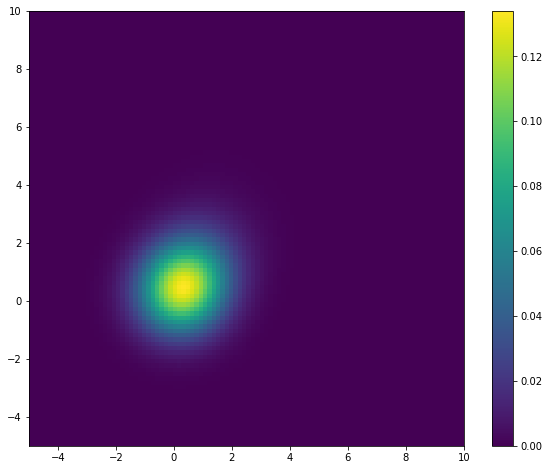

In [236]:
plt.imshow(p_fg_d, extent=dextent, interpolation='nearest', origin='lower');
plt.colorbar();

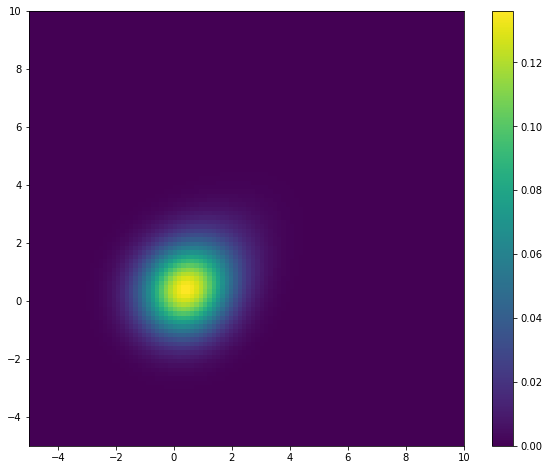

In [237]:
p_fg_a = p_bg * pratio_a
plt.imshow(p_fg_a, extent=dextent, interpolation='nearest', origin='lower');
plt.colorbar();

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


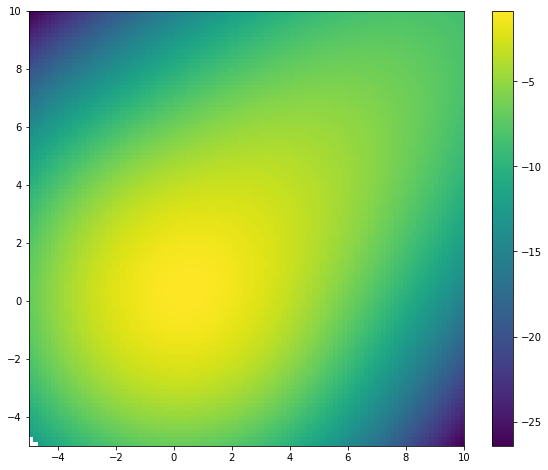

In [238]:
plt.imshow(np.log10(p_fg_a), extent=dextent, interpolation='nearest', origin='lower');
plt.colorbar();

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label'
  s)


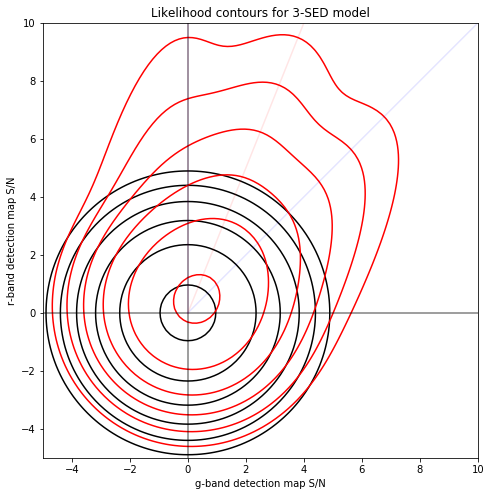

In [242]:
levs = np.arange(-6, 0)
plt.contour(np.log10(p_bg), levels=levs, linestyles='-', extent=dextent, colors='k',
           label='Background model')
plt.contour(np.log10(p_fg_d), levels=levs, linestyles='-', extent=dextent, colors='r',
           label='Foreground model (3-SED)');
plt.xlabel('g-band detection map S/N')
plt.ylabel('r-band detection map S/N');
plt.axhline(0, color='k', alpha=0.5)
plt.axvline(0, color='k', alpha=0.5);
ax = plt.axis()
xx = np.array([0,100]);
plt.plot(xx * sed_1[0], xx * sed_1[1], 'b-', alpha=0.1);
plt.plot(xx * sed_2[0], xx * sed_2[1], 'r-', alpha=0.1);
plt.plot(xx * sed_3[0], xx * sed_3[1], 'm-', alpha=0.1);
plt.axis(ax);
plt.axis('square');
plt.axis(ax);
plt.title('Likelihood contours for 3-SED model');
plt.savefig('prob-countours-d.png')

In [205]:
print(np.sum(p_bg), np.sum(p_fg_d))
(dgvals[1]-dgvals[0]) * (drvals[1]-drvals[0]) * np.sum(p_fg_d)

43.55998361066089 43.559653413149896


0.9999920434607397

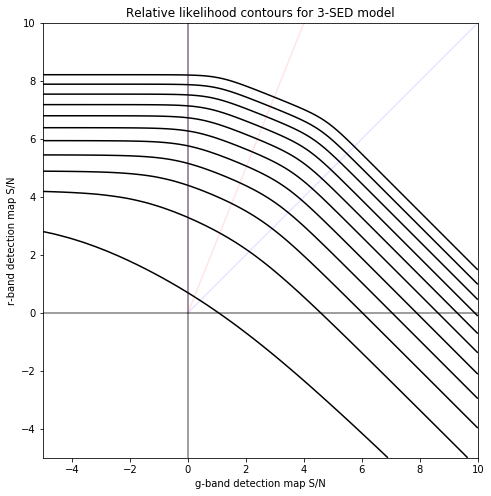

In [244]:
levs = np.arange(0, 11)
plt.contour(np.log10(pratio_d), levels=levs, linestyles='-', extent=dextent, colors='k')
plt.xlabel('g-band detection map S/N')
plt.ylabel('r-band detection map S/N');
plt.axhline(0, color='k', alpha=0.5)
plt.axvline(0, color='k', alpha=0.5);
ax = plt.axis()
xx = np.array([0,100]);
plt.plot(xx * sed_1[0], xx * sed_1[1], 'b-', alpha=0.1);
plt.plot(xx * sed_2[0], xx * sed_2[1], 'r-', alpha=0.1);
plt.plot(xx * sed_3[0], xx * sed_3[1], 'm-', alpha=0.1);
plt.axis(ax);
plt.axis('square');
plt.axis(ax);
plt.title('Relative likelihood contours for 3-SED model')
plt.savefig('prob-rel-d.png')

In [113]:
d_j_random = np.random.normal(size=(2,4000,4000))

In [132]:
pratio_r1 = get_pratio(d_j_random, sig_j, sed_1)
pratio_r2 = get_pratio(d_j_random, sig_j, sed_2)
pratio_r3 = get_pratio(d_j_random, sig_j, sed_3)
pratio_r_d = pratio_r1 * 0.45 + pratio_r2 * 0.45 + pratio_r3 * 0.1
p_r_bg = 1./np.prod(np.sqrt(2.*np.pi)*sig_j) * np.exp(-0.5 * (d_j_random / sig_j[:,np.newaxis,np.newaxis])**2)
p_r_fg = p_r_bg * pratio_r_d
pratio_r_d.shape

(4000, 4000)

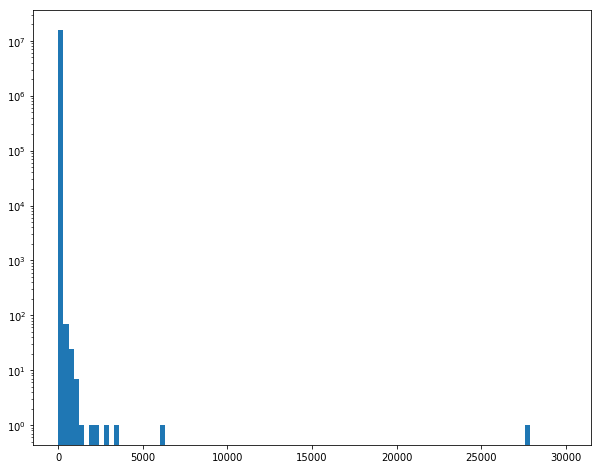

In [139]:
plt.hist(pratio_r_d.ravel(), bins=100, range=(0,30000), log=True);

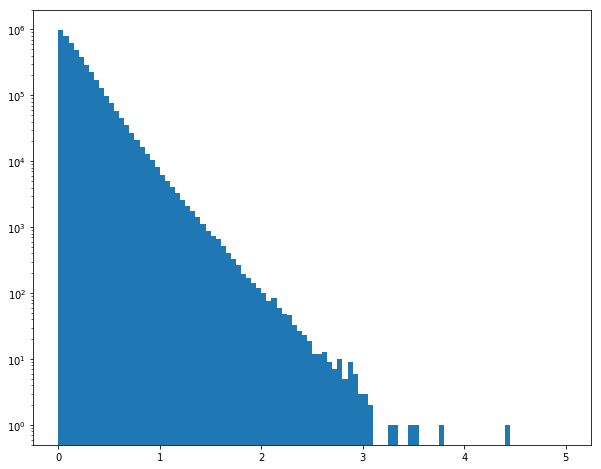

In [246]:
plt.hist(np.log10(pratio_r_d.ravel()), bins=100, range=(0,5), log=True);

In [134]:
1./falsepos

3488555.7872378975